In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from efficientnet.keras import EfficientNetB0
from keras.models import model_from_json
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd

COLOR='white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR



model_path = './poke_id'


Using TensorFlow backend.


In [2]:
model = model_from_json(open(model_path+'.json', 'r').read())
model.load_weights(model_path+'_chkpt3.h5')
model_input_shape = model.get_layer(index=0).input_shape[1:]
n_classes = model.get_layer(index=-1).output_shape[1:][0]

class_dict = dict()
for c, i in enumerate(sorted(os.listdir('../data'))):
    class_dict[c] = i
    
datagen = ImageDataGenerator(rescale=1/255.0)
datagenerator = datagen.flow_from_directory('./', 
                                            target_size = model_input_shape[:2],
                                            batch_size=1,
                                            classes=['test'],
                                            class_mode=None,
                                            shuffle=False)


Found 18 images belonging to 1 classes.


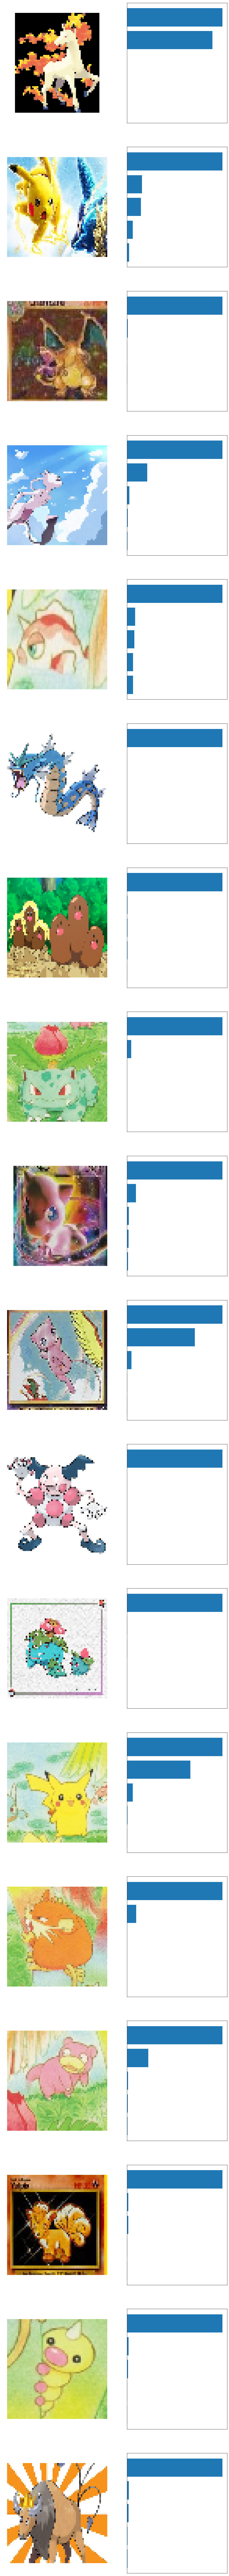

In [4]:

fig, axes = plt.subplots(nrows=len(datagenerator), ncols=2, figsize=(15, len(datagenerator)*10))
for i in range(len(datagenerator)):
    item = datagenerator.__getitem__(i)
    p = model.predict(item)[0]
    axes[i,0].imshow((item[0] * 255).astype(np.uint8));
    axes[i,0].axis('off')
    
    inds = p.argsort()[-5:][::-1]
    df=pd.DataFrame({'Poke':[class_dict[c] for c in inds],'Probability':[p[c] for c in inds]} )
    axes[i,1].barh(df.Poke, df.Probability)
    axes[i,1].set_ylabel(ylabel=None,fontsize=14)
    axes[i,1].invert_yaxis()
    axes[i,1].patch.set_alpha(0.0)
    axes[i,1].get_xaxis().set_visible(0)
fig.savefig('./fig.png')